In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 7.5)})

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'clean_dataset_co2.csv',
 'Data Cleaning.ipynb',
 'Data Processing and Visualization.ipynb',
 'fossil-fuel-co2-emissions-by-nation.csv']

In [3]:
df_orig = pd.read_csv('clean_dataset_co2.csv')
df = df_orig.copy()
df

,year,country,total_carbon_emission,solid_fuel,liquid_fuel,gas_fuel,cement,gas_flare,per_capita,bunker_fuels
0,1751,united kingdom,2552,2552,0,0,0,0,0.00,0
1,1752,united kingdom,2553,2553,0,0,0,0,0.00,0
2,1753,united kingdom,2553,2553,0,0,0,0,0.00,0
3,1754,united kingdom,2554,2554,0,0,0,0,0.00,0
4,1755,united kingdom,2555,2555,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
17227,2014,viet nam,45517,19246,12694,5349,8229,0,0.49,761
17228,2014,wallis and futuna islands,6,0,6,0,0,0,0.44,1
17229,2014,yemen,6190,137,5090,581,381,0,0.24,153
17230,2014,zambia,1228,132,797,0,299,0,0.08,33


In [4]:
print(df.info())
print(df.describe(include='all'))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   17232 non-null  int64  
 1   country                17232 non-null  object 
 2   total_carbon_emission  17232 non-null  int64  
 3   solid_fuel             17232 non-null  int64  
 4   liquid_fuel            17232 non-null  int64  
 5   gas_fuel               17232 non-null  int64  
 6   cement                 17232 non-null  int64  
 7   gas_flare              17232 non-null  int64  
 8   per_capita             17232 non-null  float64
 9   bunker_fuels           17232 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB
None
                year         country  total_carbon_emission    solid_fuel  \
count   17232.000000           17232           1.723200e+04  1.723200e+04   
unique           NaN             254          

In [5]:
df

,year,country,total_carbon_emission,solid_fuel,liquid_fuel,gas_fuel,cement,gas_flare,per_capita,bunker_fuels
0,1751,united kingdom,2552,2552,0,0,0,0,0.00,0
1,1752,united kingdom,2553,2553,0,0,0,0,0.00,0
2,1753,united kingdom,2553,2553,0,0,0,0,0.00,0
3,1754,united kingdom,2554,2554,0,0,0,0,0.00,0
4,1755,united kingdom,2555,2555,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
17227,2014,viet nam,45517,19246,12694,5349,8229,0,0.49,761
17228,2014,wallis and futuna islands,6,0,6,0,0,0,0.44,1
17229,2014,yemen,6190,137,5090,581,381,0,0.24,153
17230,2014,zambia,1228,132,797,0,299,0,0.08,33


In [6]:
def get_upper_lower_limit(df):
    
    percentile_25 = np.percentile(df, 25)
    percentile_75 = np.percentile(df, 75)

    iqr = percentile_75 - percentile_25

    lower_b = percentile_25 - (iqr*1.5)
    upper_b = percentile_75 + (iqr*1.5)
    
    return lower_b, upper_b

In [7]:
for x in df.columns:
    if x == 'country':
        continue
    low, up = get_upper_lower_limit(df[x])
    print(df[(df[x] > up) | (df[x] < low)])
    print('-'*100)

     year                   country  total_carbon_emission  solid_fuel  \
0    1751            united kingdom                   2552        2552   
1    1752            united kingdom                   2553        2553   
2    1753            united kingdom                   2553        2553   
3    1754            united kingdom                   2554        2554   
4    1755            united kingdom                   2555        2555   
..    ...                       ...                    ...         ...   
837  1867               switzerland                    184         184   
838  1867                    turkey                     62          62   
839  1867            united kingdom                  59327       59312   
840  1867  united states of america                  19887       19513   
841  1867                      ussr                    863         849   

     liquid_fuel  gas_fuel  cement  gas_flare  per_capita  bunker_fuels  
0              0         0       0   

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

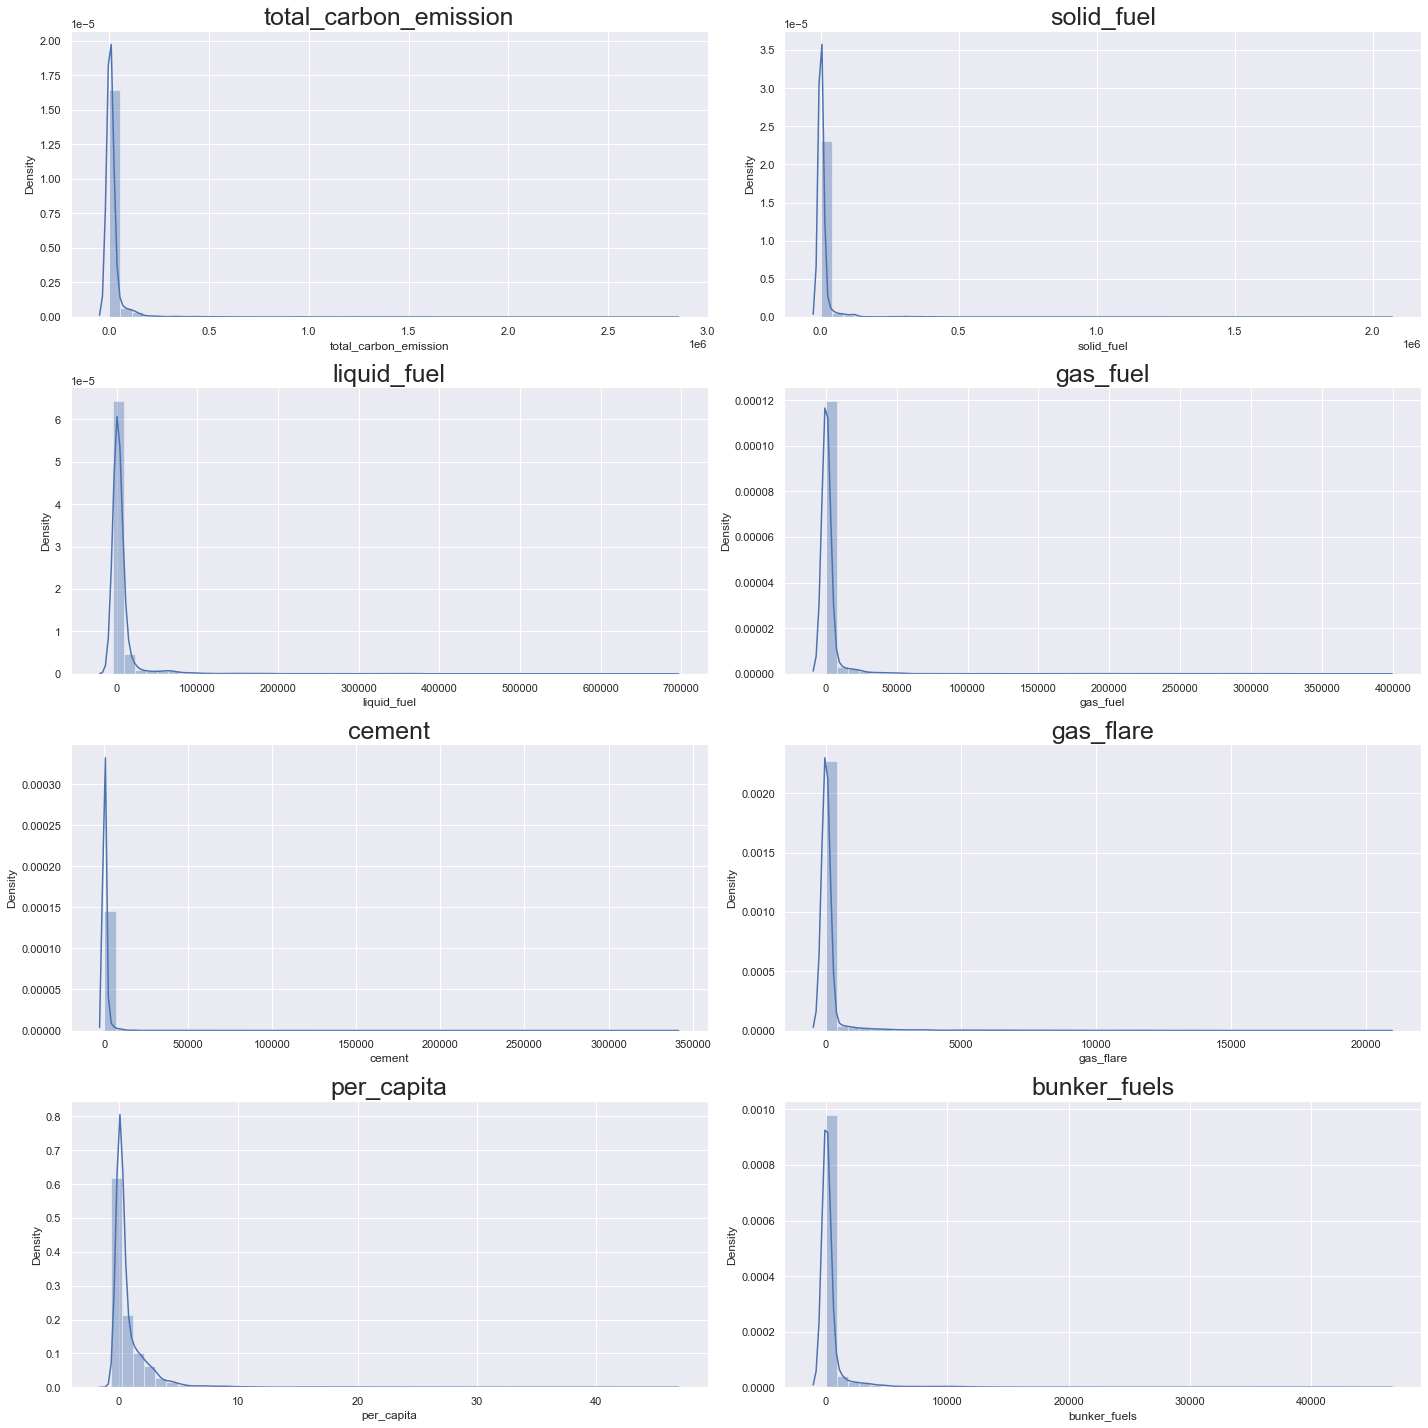

In [19]:
columns = df.columns[2:]

fig, ax = plt.subplots(4,2, figsize=(20,20))

z = 0
for x in range(4):
    for y in range(2):
        ax[x,y].set_title(columns[z], fontsize=25)
        sns.distplot(df[columns[z]], ax= ax[x,y])
        z+=1
             
plt.tight_layout()

In [12]:
import scipy.stats as stats

In [17]:
for x in columns:
    co2 = df[x]
    co2_zscore = (co2-co2.mean())/co2.std()
    print('For '+ x+'\n')
    for i in range(len(co2)):
        index = i
        stream = int(co2[i])
        z_score = round(co2_zscore[i], 2)
        prob=stats.norm.cdf(co2_zscore[i]) 
        
        if i <= 5:
            print("\tThis observation at index {0} has a value of {1} and is approximately {2}/ probility {3} standard deviations from the mean.\n".format(index, stream, z_score,prob*100))
        else:
            break

For total_carbon_emission

	This observation at index 0 has a value of 2552 and is approximately -0.18/ probility 42.943754540911 standard deviations from the mean.

	This observation at index 1 has a value of 2553 and is approximately -0.18/ probility 42.944101308289525 standard deviations from the mean.

	This observation at index 2 has a value of 2553 and is approximately -0.18/ probility 42.944101308289525 standard deviations from the mean.

	This observation at index 3 has a value of 2554 and is approximately -0.18/ probility 42.944448076212495 standard deviations from the mean.

	This observation at index 4 has a value of 2555 and is approximately -0.18/ probility 42.94479484467988 standard deviations from the mean.

	This observation at index 5 has a value of 2731 and is approximately -0.18/ probility 43.00583455066346 standard deviations from the mean.

For solid_fuel

	This observation at index 0 has a value of 2552 and is approximately -0.14/ probility 44.5418786901294 standa